<a href="https://colab.research.google.com/github/FulISun/Computer_Vision/blob/main/01_TF_2_x_2_LogisticRegression_Exercise_validation_0_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Example

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam


## [1] 데이터 생성

In [ ]:
import numpy as np

try:

    loaded_data = np.loadtxt('./diabetes.csv', delimiter = ',')

    x_data = loaded_data[ :, 0:-1]
    t_data = loaded_data[ :, [-1]]

    print(x_data.shape)
    print(t_data.shape)

except Exception as err:

    print(str(err))

(759, 8)
(759, 1)


## [2] 모델 구축

In [ ]:
model = Sequential()

model.add( Dense( t_data.shape[1],
                 input_shape=(x_data.shape[1], ), activation = 'sigmoid') )

## [3] 모델 컴파일

In [ ]:
model.compile(optimizer = SGD(learning_rate=0.01),
              loss = 'binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


## [4] 모델 학습

In [ ]:
from datetime import datetime

start_time = datetime.now()

# hist = model.fit(x_data, t_data, epochs = 500, validation_split = 0.2, verbose = 2)
# hist = model.fit(x_data, t_data, epochs = 500, validation_split = 0.3, verbose = 2)
hist = model.fit(x_data, t_data, epochs = 200, validation_split = 0.3, verbose = 2)
print()
print('running time = ', start_time - datetime.now())

Epoch 1/200
17/17 - 1s - loss: 0.8275 - accuracy: 0.3409 - val_loss: 0.8031 - val_accuracy: 0.3553 - 554ms/epoch - 33ms/step
Epoch 2/200
17/17 - 0s - loss: 0.8033 - accuracy: 0.3616 - val_loss: 0.7793 - val_accuracy: 0.4035 - 54ms/epoch - 3ms/step
Epoch 3/200
17/17 - 0s - loss: 0.7828 - accuracy: 0.3879 - val_loss: 0.7591 - val_accuracy: 0.4474 - 69ms/epoch - 4ms/step
Epoch 4/200
17/17 - 0s - loss: 0.7656 - accuracy: 0.4162 - val_loss: 0.7420 - val_accuracy: 0.4649 - 63ms/epoch - 4ms/step
Epoch 5/200
17/17 - 0s - loss: 0.7510 - accuracy: 0.4313 - val_loss: 0.7274 - val_accuracy: 0.4912 - 68ms/epoch - 4ms/step
Epoch 6/200
17/17 - 0s - loss: 0.7384 - accuracy: 0.4539 - val_loss: 0.7145 - val_accuracy: 0.5132 - 55ms/epoch - 3ms/step
Epoch 7/200
17/17 - 0s - loss: 0.7275 - accuracy: 0.4878 - val_loss: 0.7037 - val_accuracy: 0.5570 - 58ms/epoch - 3ms/step
Epoch 8/200
17/17 - 0s - loss: 0.7183 - accuracy: 0.5160 - val_loss: 0.6943 - val_accuracy: 0.5614 - 65ms/epoch - 4ms/step
Epoch 9/200
17

## [5] 모델 정확도 평가

In [ ]:
model.evaluate(x_data, t_data)

24/24 [==============================] - 0s 2ms/step - loss: 0.5255 - accuracy: 0.7484


[0.5255348086357117, 0.748353123664856]

## [6] 손실 및 정확도 추세

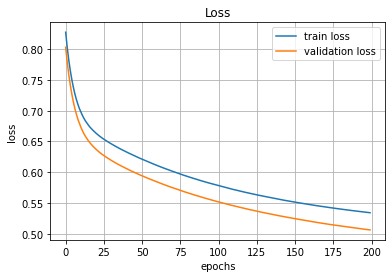

In [ ]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label = 'train loss')
plt.plot(hist.history['val_loss'], label = 'validation loss')

plt.legend(loc = 'best')

plt.show()

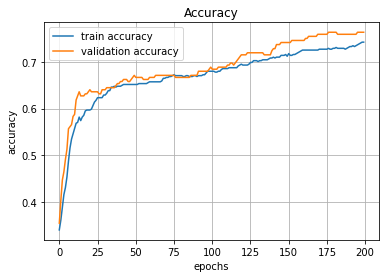

In [ ]:
import matplotlib.pyplot as plt

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label = 'train accuracy')
plt.plot(hist.history['val_accuracy'], label = 'validation accuracy')

plt.legend(loc = 'best')

plt.show()